### Unsupervised Learning Tools using Sci-KitLearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\CourseMaterials\DATA\wholesome_customers_data.csv')

<Figure size 1600x1600 with 0 Axes>

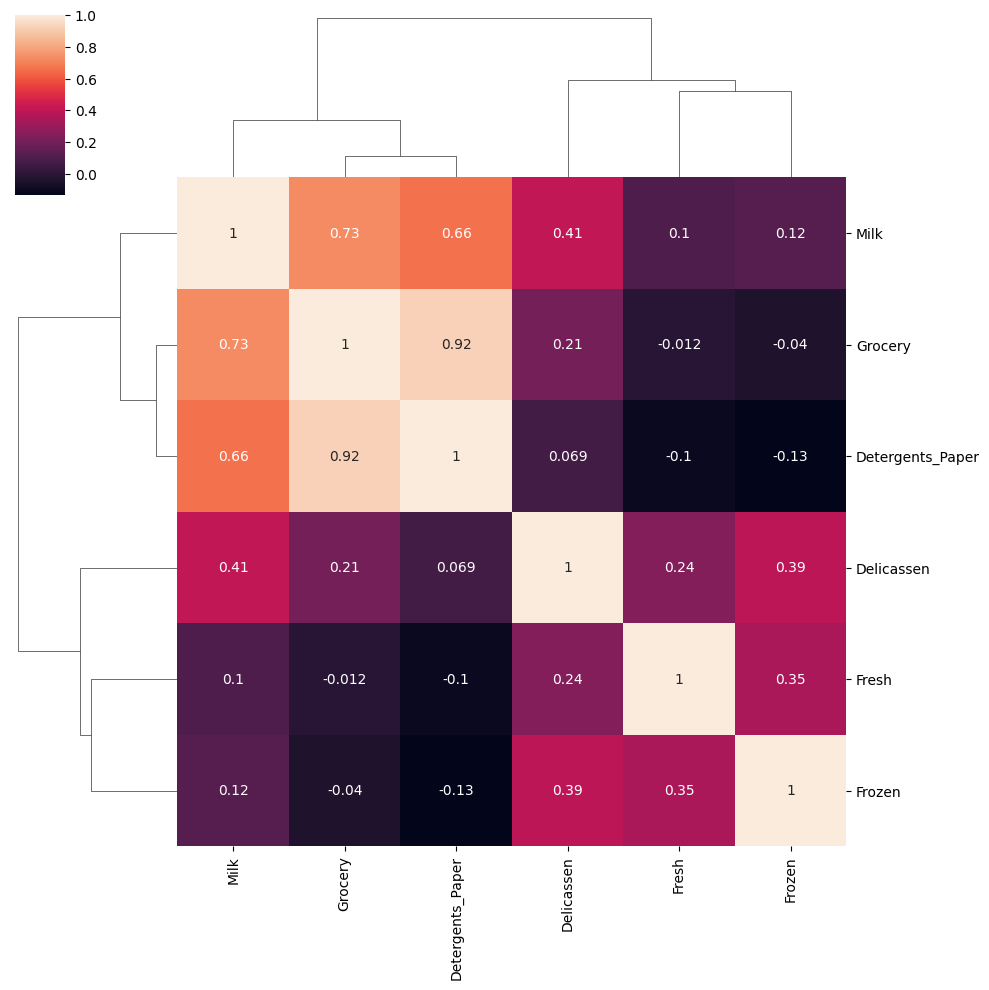

In [9]:
plt.figure(figsize=(16,16))
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(),annot=True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

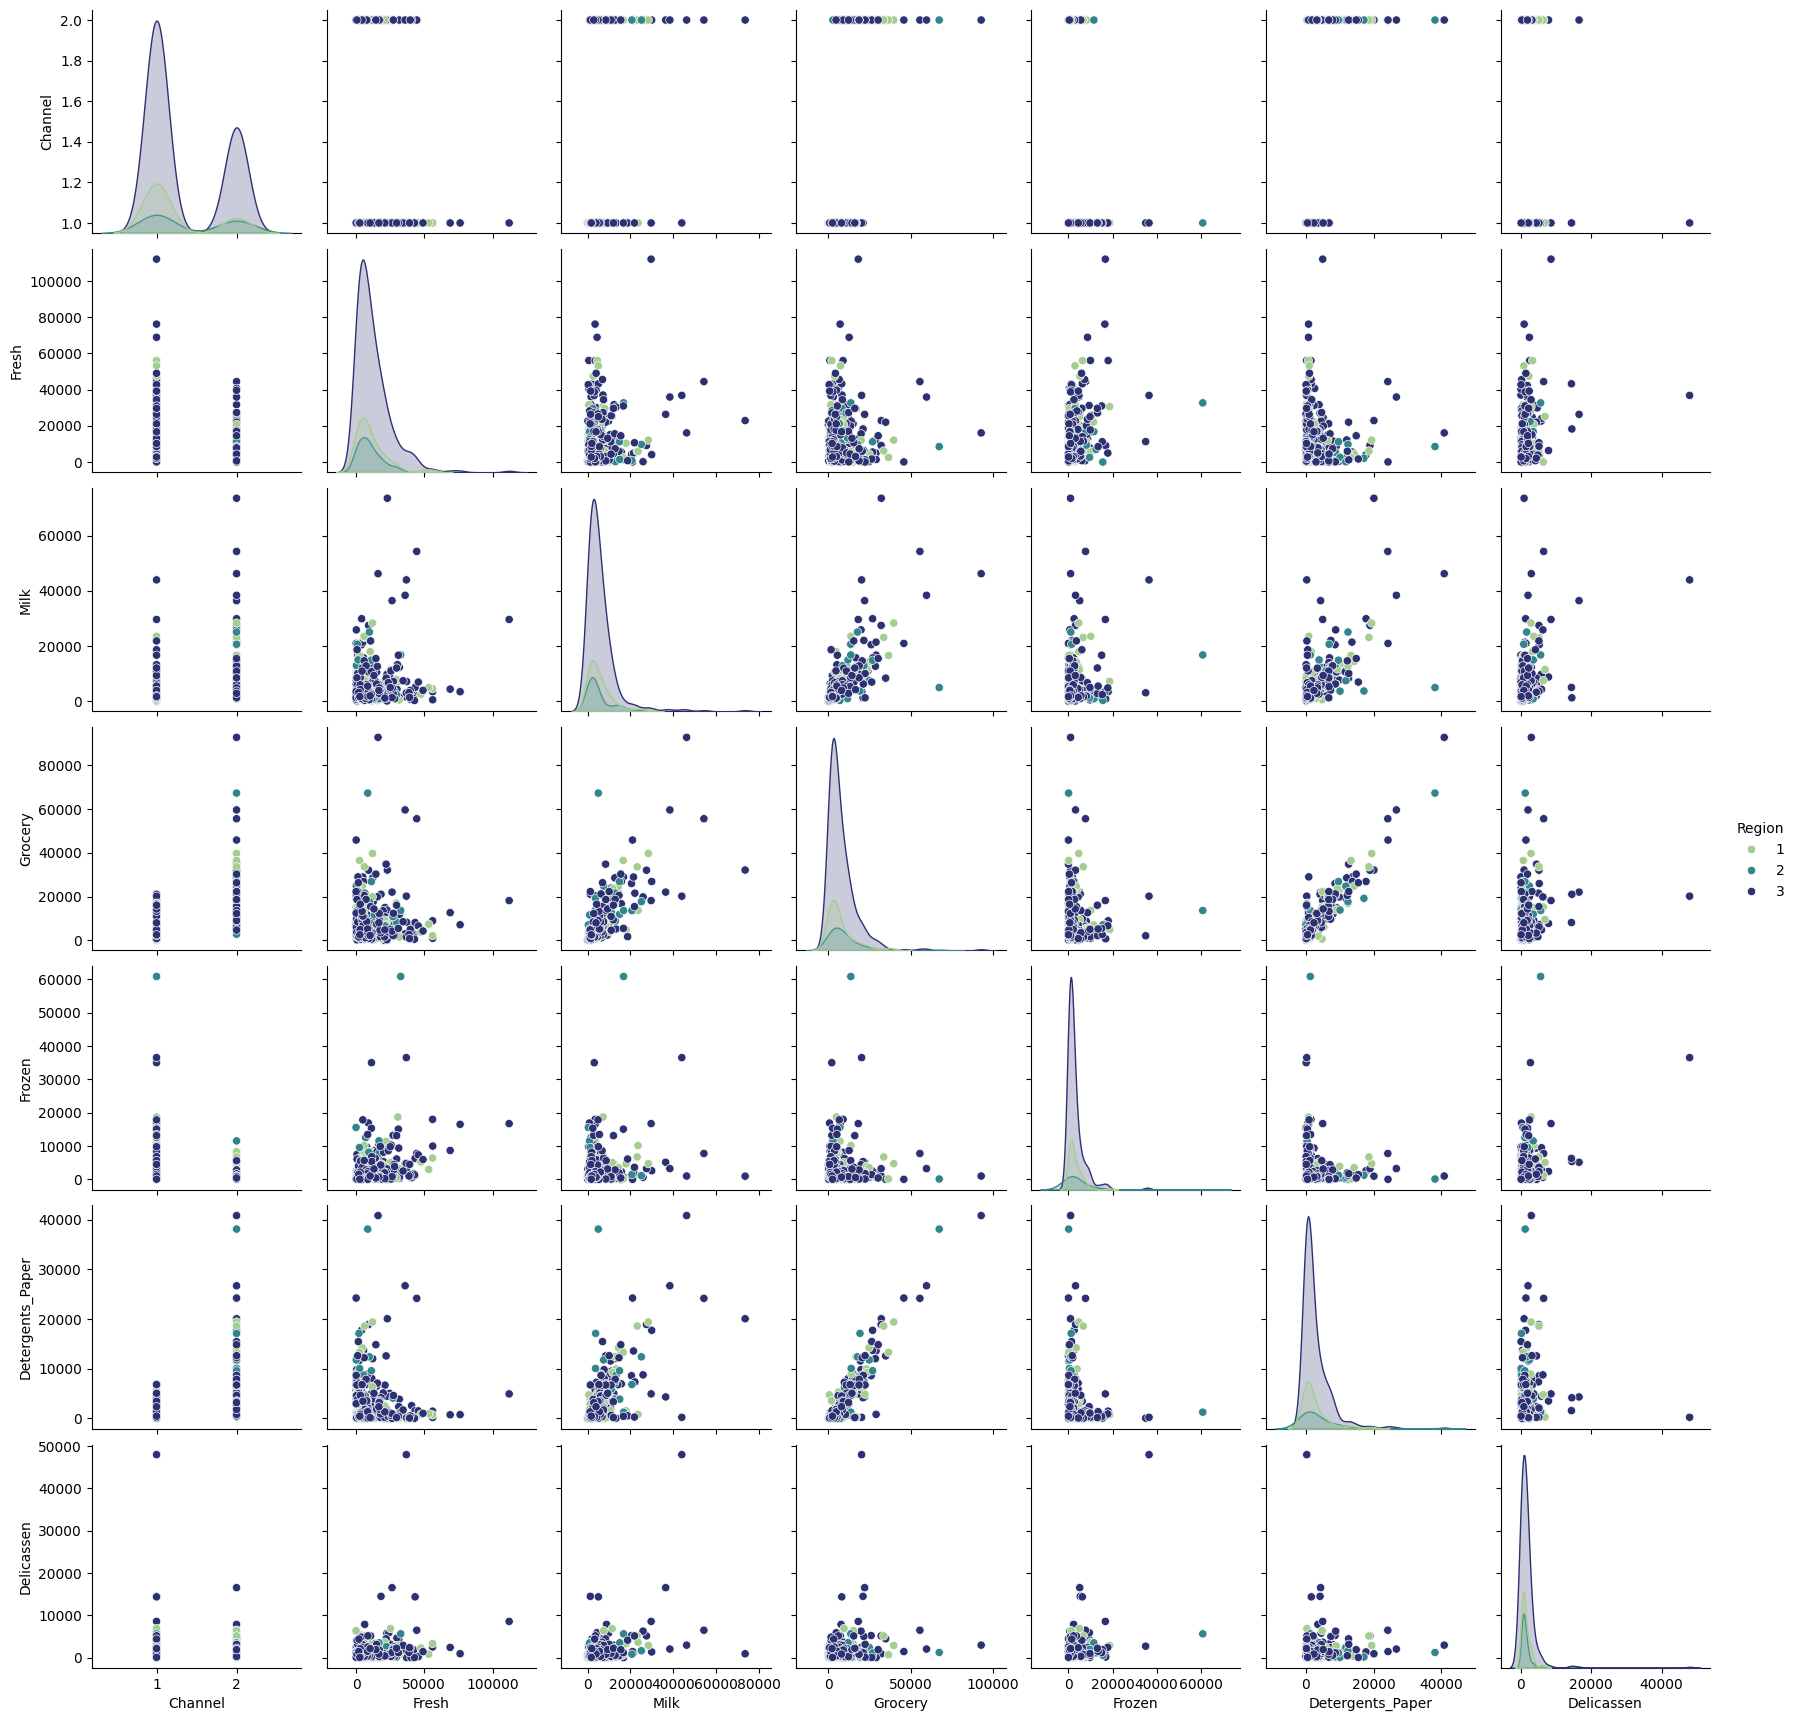

In [10]:
plt.figure(figsize=(12,12))
sns.pairplot(df, hue="Region",palette="crest")
plt.show()

#### Loop for trying different values

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = scaler.fit_transform(df)

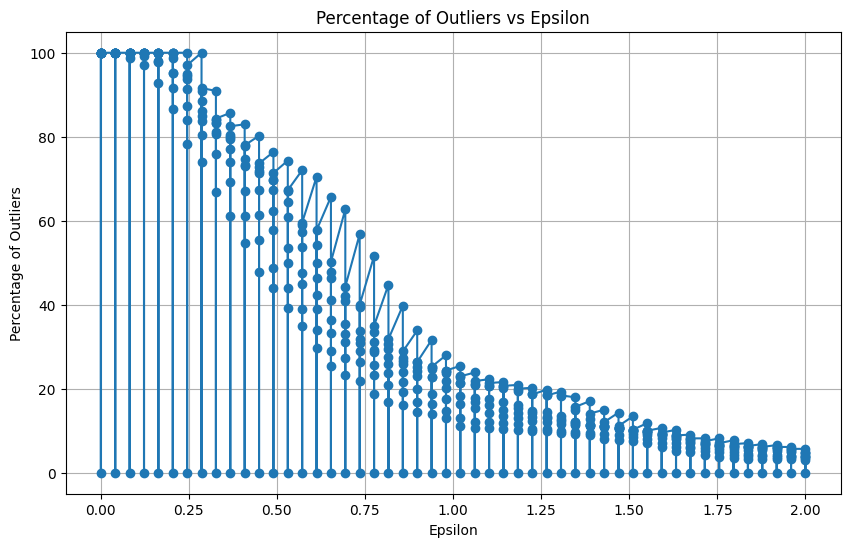

In [31]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs  # Example dataset
import pandas as pd
from itertools import product

# Define the range of epsilon values to test
epsilon_values = np.linspace(0.001, 2, 50)

# Calculate min_samples as 2 times the number of features
min_samples = [2 * df.shape[1],1,2,3,4,5,6,7,8,9]

# Initialize a list to store results
results = []

# Loop through epsilon values
for epsilon,min_sample in product(epsilon_values,min_samples):
    # Create and fit the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
    dbscan.fit(df)

    # Calculate the percentage of outliers (points labeled as -1)
    labels = dbscan.labels_
    n_outliers = np.sum(labels == -1)
    percent_outliers = (n_outliers / len(labels)) * 100

    # Log the results
    results.append({
        "epsilon": epsilon,
        "mininum samples": min_sample,
        "percent_outliers": percent_outliers,
        "n_clusters": len(set(labels)) - (1 if -1 in labels else 0)  # Number of clusters (excluding noise)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Optionally, plot the percentage of outliers vs epsilon
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df["epsilon"], results_df["percent_outliers"], marker="o")
plt.xlabel("Epsilon")
plt.ylabel("Percentage of Outliers")
plt.title("Percentage of Outliers vs Epsilon")
plt.grid(True)
plt.show()

In [34]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*df.shape[1])
    dbscan.fit(df)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

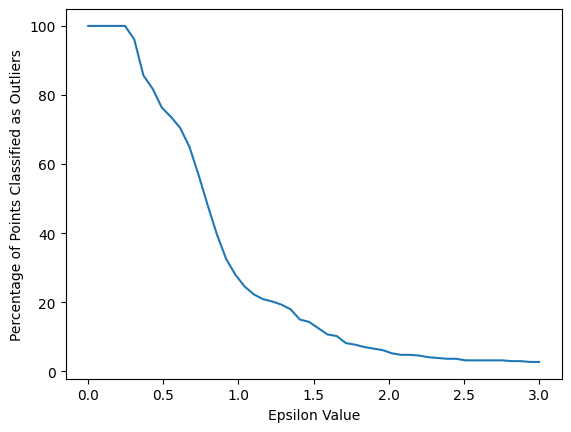

In [35]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

### Supervised Learning Pipeline using Sci-KitLearn

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Set Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



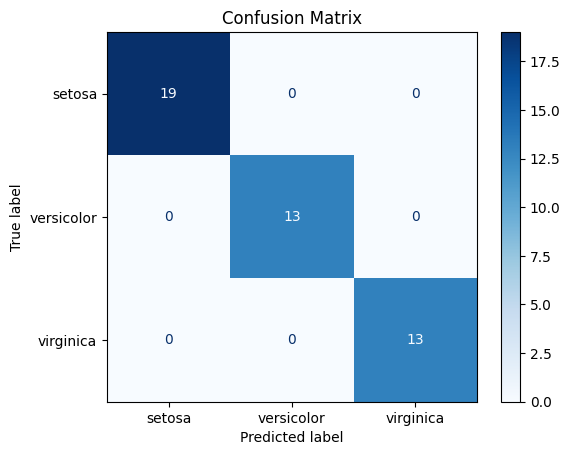

Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Accuracy: 0.9666666666666668


In [36]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


# Step 1: Load or generate data
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing and EDA goes here!!

# Step 3: Define the model and parameter grid for GridSearchCV
model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Step 4: Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 5: Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Step 7: Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=data.target_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 9: (Optional) Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())